## Logistic Regression with scikit-learn

simple example of single-variate binary classification problem
Steps : 
1. Import packages, functions, and classes
2. Get data to work with and, if appropriate, transform it
3. Create a classification model and train (or fit) it with your existing data
4. Evaluate your model to see if its performance is satisfactory




In [ ]:
#Step 1: import 
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix



In [ ]:
# Step 2: Get data
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
print(x ,y)


[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]] [0 0 0 0 1 1 1 1 1 1]


In [ ]:
# Step 3: Create a model and train it
#LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, 
# intercept_scaling=1, class_weight=None, 
# random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', 
# verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

model = LogisticRegression((solver='liblinear',   random_state=0)
model.fit(x, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# get the attributes of model .classes_ represents the array of distinct values that y takes
print('model.classes_    ', model.classes_)

# get the value of the slope 𝑏₁ and the intercept 𝑏₀ of the linear function 𝑓
print('model.coef_       ', model.coef_)
print('model.intercept_  ', model.intercept_)

model.classes_     [0 1]
model.coef_        [[0.51491375]]
model.intercept_   [-1.04608067]


In [ ]:
#check performance of model with .predict_proba(), 
# which returns the matrix of probabilities that the predicted output is equal to zero or one

print( model.predict_proba(x)) 

# each row corresponds to a single observation. 
# The first column is the probability of the predicted output being zero, that is 1 - 𝑝(𝑥). 
# The second column is the probability that the output is one, or 𝑝(𝑥).
# actual result ->  [0 0 0 0 1 1 1 1 1 1]

[[0.74002157 0.25997843]
 [0.62975524 0.37024476]
 [0.5040632  0.4959368 ]
 [0.37785549 0.62214451]
 [0.26628093 0.73371907]
 [0.17821501 0.82178499]
 [0.11472079 0.88527921]
 [0.07186982 0.92813018]
 [0.04422513 0.95577487]
 [0.02690569 0.97309431]]


In [ ]:
#the actual predictions, based on the probability matrix and the values of 𝑝(𝑥),
print(model.predict(x))

[0 0 0 1 1 1 1 1 1 1]


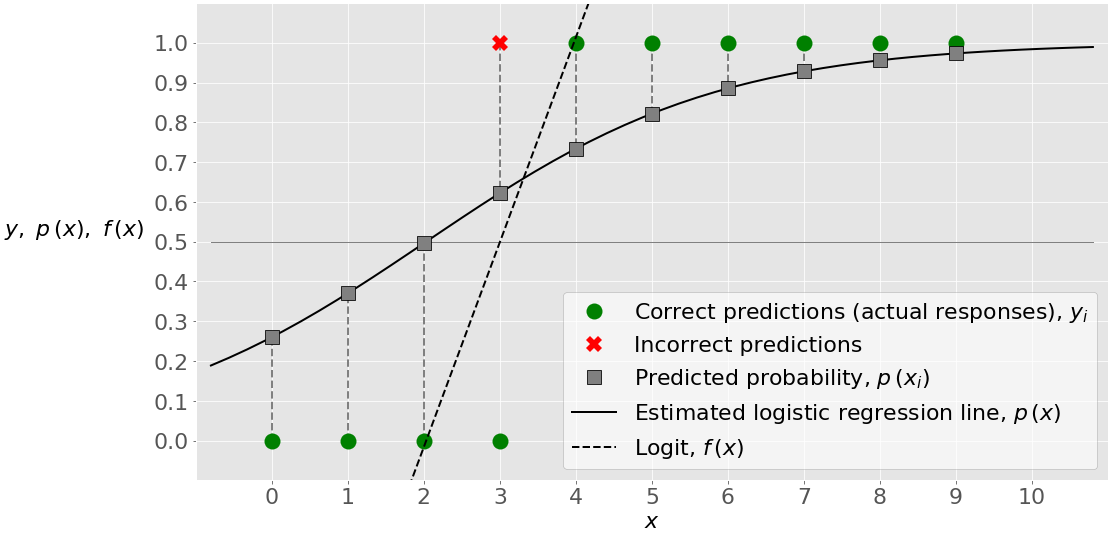

The figure illustrates input, output, and classification result.
The green circles represent the actual responses as well as the correct predictions. The red × shows the incorrect prediction. The full black line is the estimated logistic regression line 𝑝(𝑥). The grey squares are the points on this line that correspond to 𝑥 and the values in the second column of the probability matrix. The black dashed line is the logit 𝑓(𝑥).

The value of 𝑥 slightly above 2 corresponds to the threshold 𝑝(𝑥)=0.5, which is 𝑓(𝑥)=0. This value of 𝑥 is the boundary between the points that are classified as zeros and those predicted as ones.

For example, the first point has input 𝑥=0, actual output 𝑦=0, probability 𝑝=0.26, and a predicted value of 0. The second point has 𝑥=1, 𝑦=0, 𝑝=0.37, and a prediction of 0. Only the fourth point has the actual output 𝑦=0 and the probability higher than 0.5 (at 𝑝=0.62), so it’s wrongly classified as 1. All other values are predicted correctly.

In [ ]:
# the accuracy score can be calculated 
print(model.score(x,y))

0.9


To get more information on the accuracy of the model with a confusion matrix. In the case of binary classification, the confusion matrix shows the numbers of the following:

* True negatives in the upper-left position
* False negatives in the lower-left position
* False positives in the upper-right position
* True positives in the lower-right position

To create the confusion matrix, you can use confusion_matrix() and provide the actual and predicted outputs as the arguments:

In [ ]:
confusion_matrix(y, model.predict(x))

array([[3, 1],
       [0, 6]])

The obtained matrix shows the following:

- Three true negative predictions: The first three observations are zeros predicted correctly.
- No false negative predictions: These are the ones wrongly predicted as zeros.
- One false positive prediction: The fourth observation is a zero that was wrongly predicted as one.
- Six true positive predictions: The last six observations are ones predicted correctly.

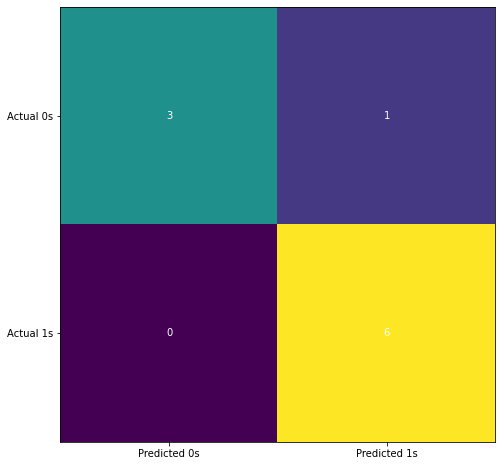

In [ ]:
# generate heatmap
import matplotlib.pyplot as plt
cm = confusion_matrix(y, model.predict(x))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [ ]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



In [ ]:
#Putting it all together
# Step 4: Evaluate the model 
p_pred = model.predict_proba(x)
y_pred = model.predict(x)
score_ = model.score(x, y)
conf_m = confusion_matrix(y, y_pred)
report = classification_report(y, y_pred)


### Improve the model 

In [ ]:
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(x, y)
print('model.classes_    ', model.classes_)

# get the value of the slope 𝑏₁ and the intercept 𝑏₀ of the linear function 𝑓
print('model.coef_       ', model.coef_)
print('model.intercept_  ', model.intercept_)

print('model.predict_proba(x)  ', model.predict_proba(x))
print('model.predict(x)  ', model.predict(x))

model.classes_     [0 1]
model.coef_        [[1.12066084]]
model.intercept_   [-3.51335372]
model.predict_proba(x)   [[0.97106534 0.02893466]
 [0.9162684  0.0837316 ]
 [0.7810904  0.2189096 ]
 [0.53777071 0.46222929]
 [0.27502212 0.72497788]
 [0.11007743 0.88992257]
 [0.03876835 0.96123165]
 [0.01298011 0.98701989]
 [0.0042697  0.9957303 ]
 [0.00139621 0.99860379]]
model.predict(x)   [0 0 0 0 1 1 1 1 1 1]


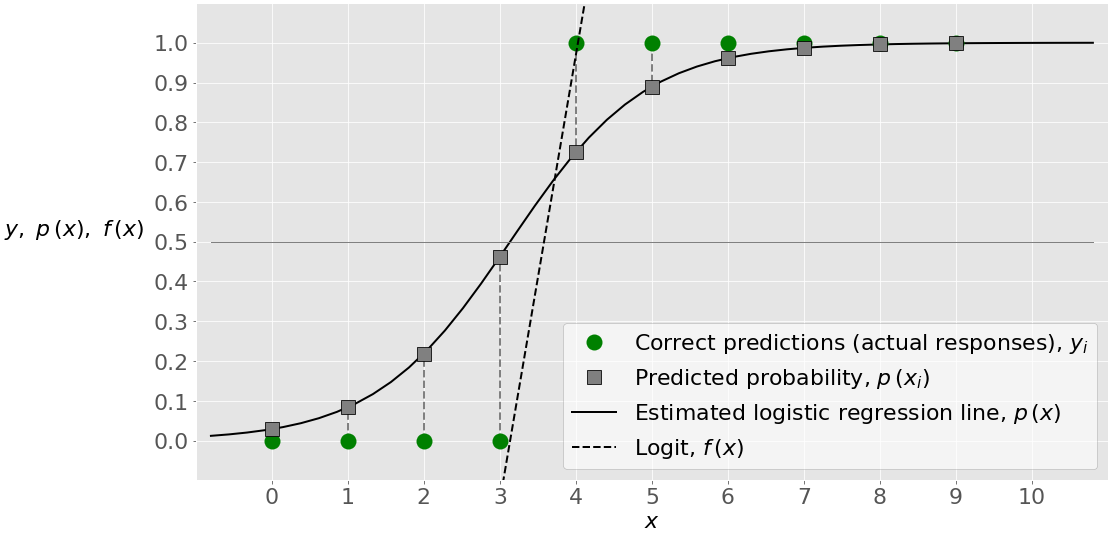

In [ ]:
print(model.score(x, y))
print(confusion_matrix(y, model.predict(x)))
print(classification_report(y, model.predict(x)))


1.0
[[4 0]
 [0 6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



### Student studied vs pass-fail

In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/sarwansingh/Python/master/ClassExamples/data/student-pass-fail-data.csv')
df.head()

,Self_Study_Daily,Tutorials_Monthly,Pass_Or_Fail
0,7,27,1
1,2,43,0
2,7,26,1
3,8,29,1
4,3,42,0


In [ ]:
x = df.drop('Pass_Or_Fail',axis = 1)
y = df.Pass_Or_Fail
print(x[:5])
print(y[:5])

   Self_Study_Daily  Tutorials_Monthly
0                 7                 27
1                 2                 43
2                 7                 26
3                 8                 29
4                 3                 42
0    1
1    0
2    1
3    1
4    0
Name: Pass_Or_Fail, dtype: int64


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=4)
print("x_train.shape :", x_train.shape)
print("x_test.shape :",x_test.shape)
print("y_train.shape :", y_train.shape)
print("y_test.shape :",y_test.shape)

x_train.shape : (750, 2)
x_test.shape : (250, 2)
y_train.shape : (750,)
y_test.shape : (250,)


In [ ]:
logistic_regression = LogisticRegression(C=10)
logistic_regression.fit(x_train,y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = logistic_regression.predict(x_test)
print(y_pred)

[1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 1
 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 1 0 0 0 0 1 1 1
 1 0 1 1 1 0 0 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0
 1 0 1 0 0 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1
 1 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0
 0 0 0 1 1 1 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 0
 1 1 0 1 1 1 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 1]


In [ ]:
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy_percentage = 100 * accuracy
print(accuracy, " Percentage " ,accuracy_percentage)

0.968  Percentage  96.8


In [ ]:
# predicting whether a student will fail or pass
amit = logistic_regression.predict( [[7,60]])      #(np.array([7, 26]).reshape(1, -1)))
print(amit)  

sita = logistic_regression.predict((np.array([7, 27]).reshape(1, -1)))
print(sita)  


[0]
[1]
